In [40]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import ErdosRenyi, SmallWorld
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
n = 1000 # number of vertices
p = 4 / n # avg deg 
T = 10000
TAIL = T // 2
I = 10

In [3]:
alpha = .10
bs = partition(0, 12, 128)

In [22]:
def calc():
    pool = Pool(32)
    res = []
    timer = Timer()
    for i in range(I):
        local_timer = Timer()
        graph = ErdosRenyi(n, p)
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs]))
        print(f'realization {i} passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return np.array(res)

In [6]:
%%notify
mem = calc()

realization 0 passed in 657.9080998897552
realization 1 passed in 670.7007865905762
realization 2 passed in 688.9812769889832
realization 3 passed in 693.6396291255951
realization 4 passed in 671.8669304847717
realization 5 passed in 671.950079202652
realization 6 passed in 693.8642301559448
realization 7 passed in 716.1488974094391
realization 8 passed in 664.0466601848602
realization 9 passed in 665.7730677127838
time elapsed = 6794.8925540447235


<IPython.core.display.Javascript object>

In [42]:
mem.shape

(10, 128, 10000)

In [44]:
def plot_mean_and_std(bs, data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

<IPython.core.display.Javascript object>


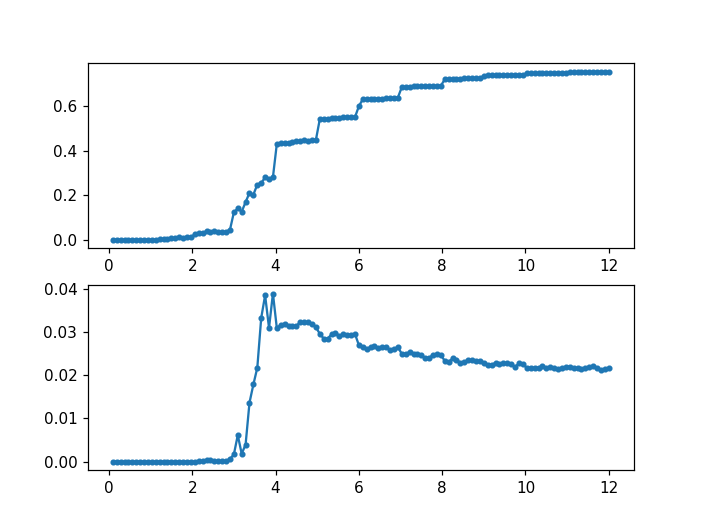

In [45]:
plot_mean_and_std(bs, mem, TAIL)

<IPython.core.display.Javascript object>


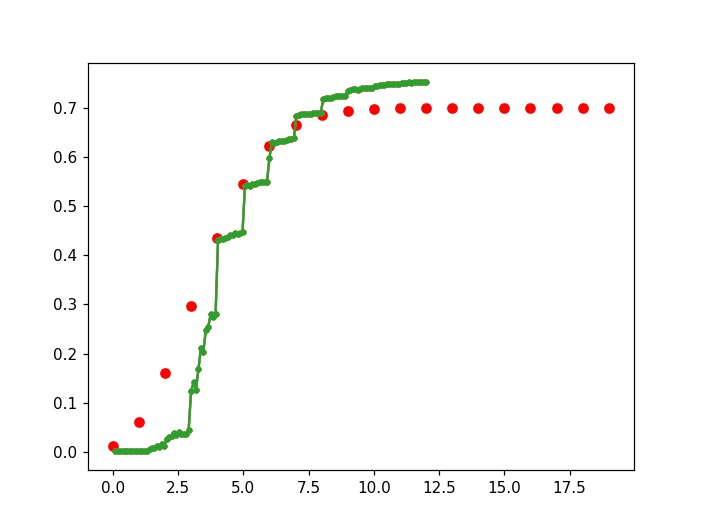

In [32]:
s = [0] * 20
for graph in graphs:
    for d, cnt in graph.degrees().items():
        s[d] += cnt
s = np.array(s)
s = s / sum(s)
for i in range(1, len(s)):
    s[i] += s[i - 1]
plt.scatter(np.arange(len(s)), s * .7, c='red')

In [26]:
for i in range(10):
    graphs.append(ErdosRenyi(n, p))